# 4. Lab: Decision Trees, Random Forests and k-NN.
## 1. Objectives


1.  Understand the basics of decision trees, random forests and k-NN.
2. Learn to work with simple datasets.
3. Use decision trees for classification and regression.
4. Use random forests and k-NN for classification.
5. Experiment with different splitting criteria, pruning, number of estimators, v.
6. Evaluate model performance using appropriate metrics.




## 2. Hand-in instructions
You are expected to hand-in a Jupyter notebook based on this one. Your notebook should contain running code and answer all questions posed in this assignment.

You can structure your code as you wish, as long as it is well structured and commented. You can structure it in different files or in a single one. The code provided in this assignment is a suggestion, feel free to solve the exercises as you wish


# Decision Trees
## Decision trees for classification
First, we will implement a decision tree to classify Wine quality.
Load the Wine Quality dataset from UCI Machine Learning Repository. Print information about the data like names of features, number of datapoints, data types.


In [66]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score


# Load the Wine Quality dataset
# Downloading dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Explore the dataset
print("First 5 rows of the dataset:\n", data.head())
print("\nDataset Information:")
print(data.info())

# Print feature names and basic statistics
print("\nFeature names:", data.columns.tolist())
print("\nNumber of datapoints:", data.shape[0])

# Split the dataset into features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

First 5 rows of the dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8  

As we aim for a classification task, we will binarize the quality feature (high quality = a score of more than 5).

In [67]:
# Binarize the target variable for classification
y_class = (y >= 6).astype(int)

Split the dataset into training and test sets using train_test_split from scikit learn.

In [68]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets for classification (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_class)

# Print the shape of the train and test sets to confirm the split
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Test set shape (y_test):", y_test.shape)

Training set shape (X_train): (1199, 11)
Training set shape (y_train): (1199,)
Test set shape (X_test): (400, 11)
Test set shape (y_test): (400,)


Train a decision tree classifier and evaluate it using a confusion matrix and a classification report.

In [69]:
from sklearn.tree import DecisionTreeClassifier

""".venv/lib/python3.11/site-packages/sklearn/tree/_classes.py

    random_state : int, RandomState instance or None, default=None
        Controls the randomness of the estimator. The features are always
        randomly permuted at each split, even if ``splitter`` is set to
        ``"best"``. When ``max_features < n_features``, the algorithm will
        select ``max_features`` at random at each split before finding the best
        split among them.
"""

# Create and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.78


Confusion Matrix:
 [[132  53]
 [ 35 180]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       185
           1       0.77      0.84      0.80       215

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



**What is the random_state parameter?**

The random_state is a parameter in scikit-learn's models, including the DecisionTreeClassifier, controls the randomness involved in certain operations.

**What does changing it accomplish?**

If random_state is changing, every time you train the model or split the data, it will produce different results due to the inherent randomness in the training process.

**What is a confusion matrix? Analyze the confusion matrix that you obtained.**

A confusion matrix is a performance measurement for classification tasks. 
If we look at the matrix we can see the diagonal representing the positive cases. In our case 136 and 148 with good prediction. On the other hand if we look at the top and bottom of the matrix we can know the number of cases in which the prediction has failed, which in our case is 60 and 56 that are less of the good ones.

### Visualising decision trees
We will explore different decision tree visualisations.

In [70]:
text_representation = export_text(dt)
print(text_representation)

|--- feature_10 <= 10.35
|   |--- feature_9 <= 0.53
|   |   |--- feature_1 <= 0.34
|   |   |   |--- feature_2 <= 0.38
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.38
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.34
|   |   |   |--- feature_10 <= 9.53
|   |   |   |   |--- feature_3 <= 9.00
|   |   |   |   |   |--- feature_3 <= 1.45
|   |   |   |   |   |   |--- feature_1 <= 0.67
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.67
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  1.45
|   |   |   |   |   |   |--- feature_4 <= 0.07
|   |   |   |   |   |   |   |--- feature_3 <= 2.45
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  2.45
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.07
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  9.00
|   |   |   |   |   |--- class: 1
|   |   |   |-

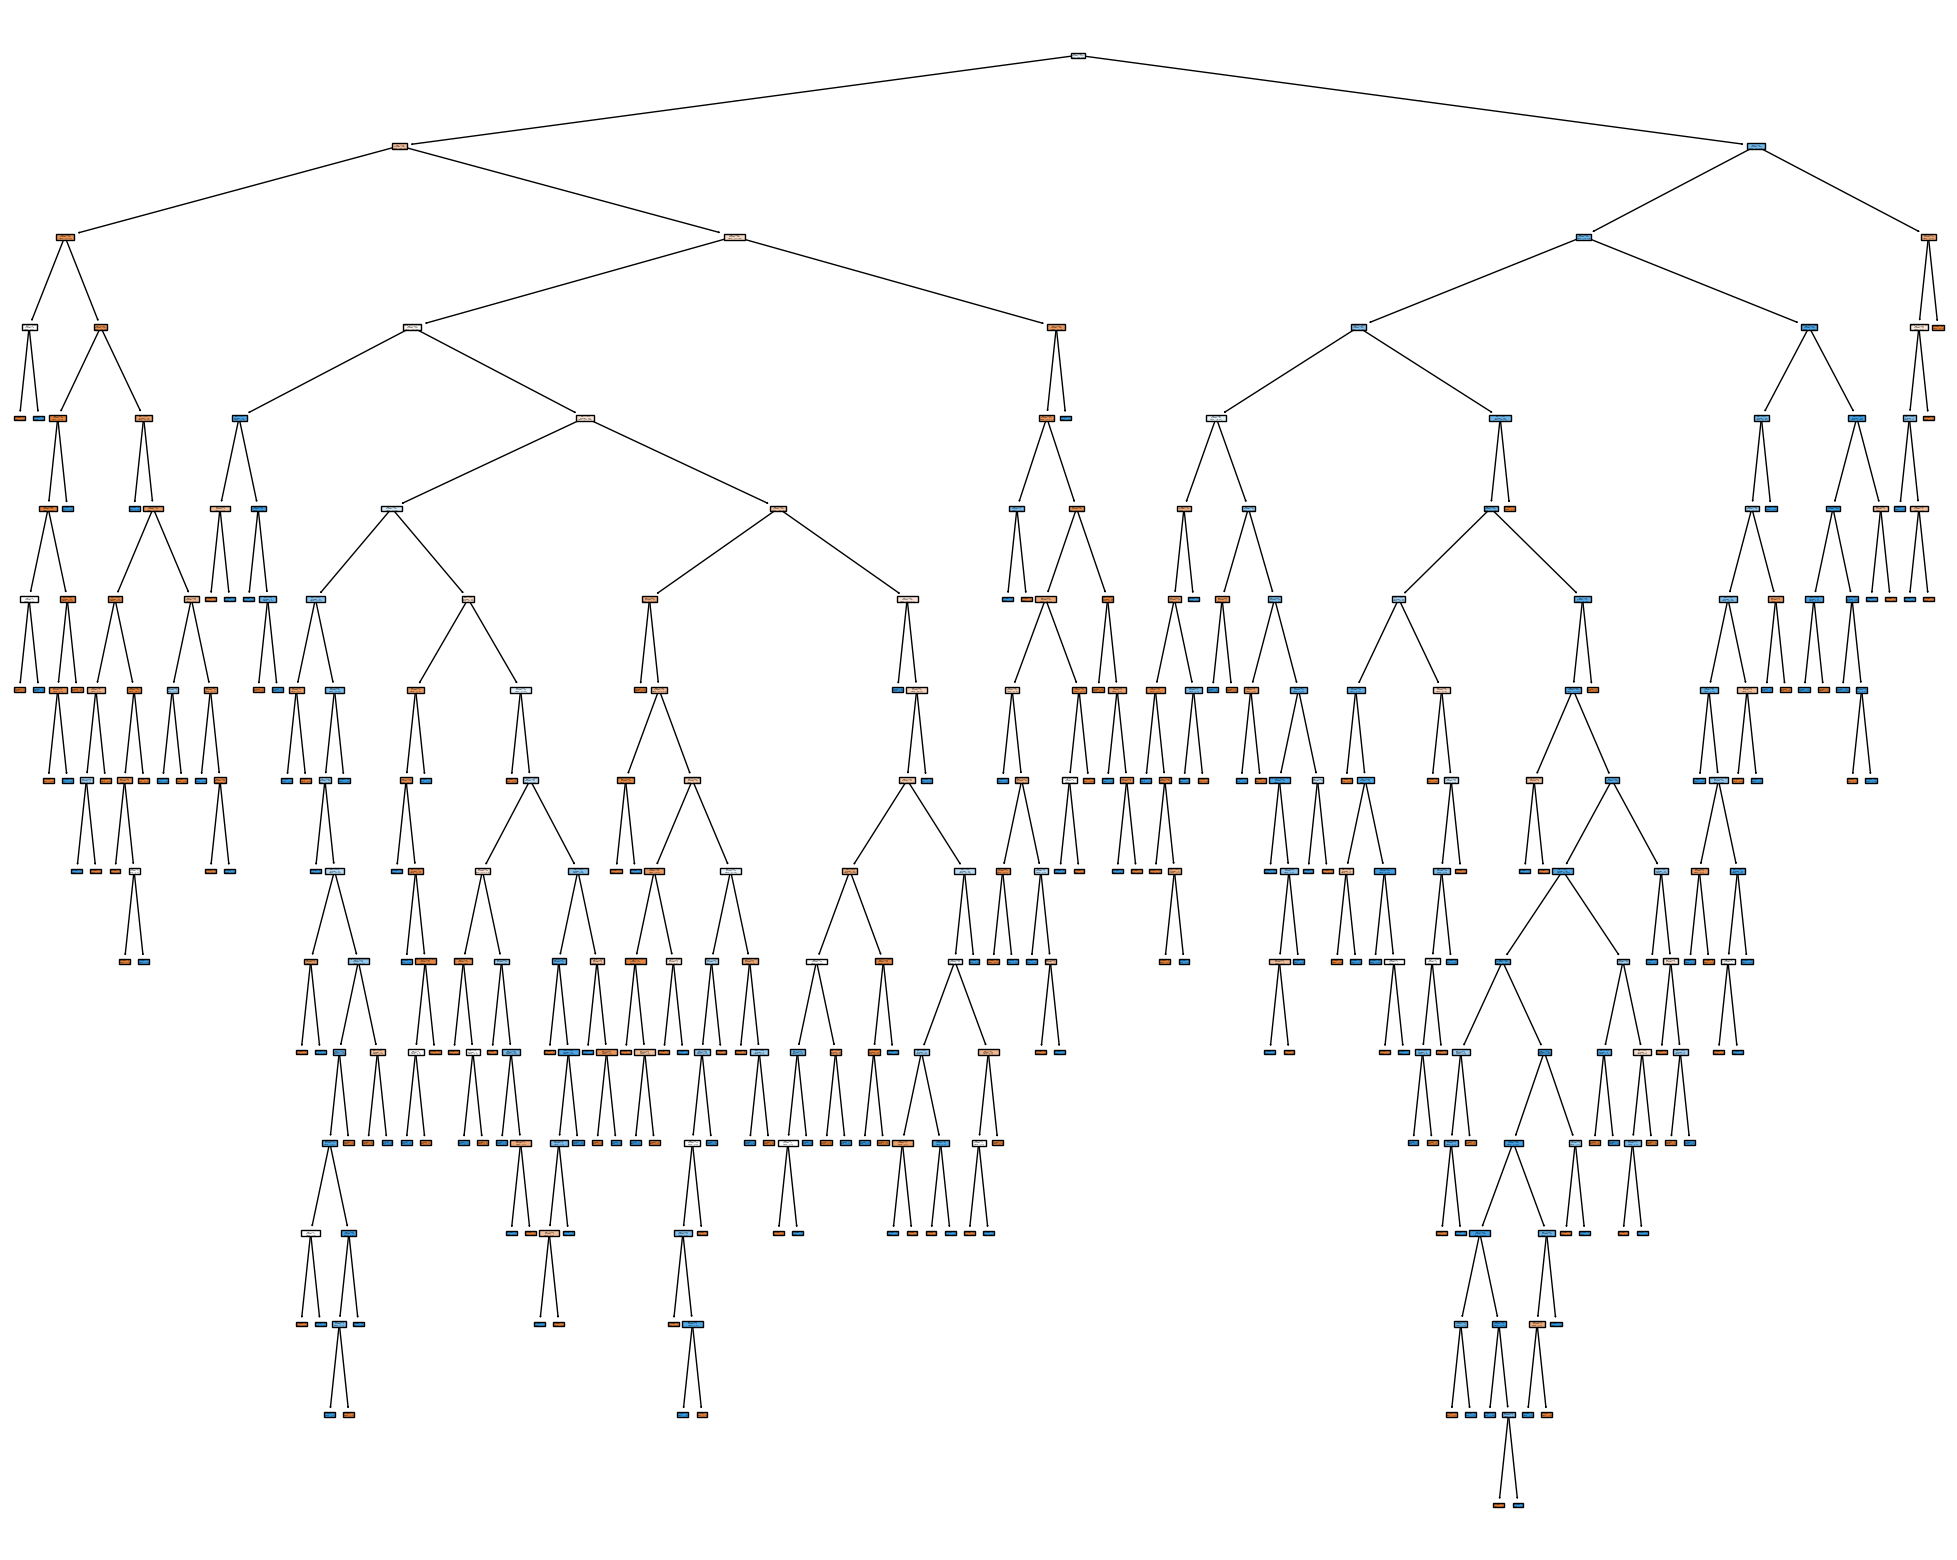

In [71]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt,
                   feature_names=list(X.columns),
                   class_names=None,
                   filled=True)

**What do the graphs represent? Would you say a tree is explainable?**

Represents a decision tree, likely generated after training a decision tree classifier on a dataset. Each node in the tree represents a decision based on one of the features, and the tree structure represents the recursive splitting of the dataset into subsets to make predictions (classification).

---

### Pruning decision trees

We will now pre-prune the tree.

In [72]:
from sklearn.tree import DecisionTreeClassifier

""" .venv/lib/python3.11/site-packages/sklearn/tree/_classes.py

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
"""

# Pruning the tree
dt_class_pruned = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_class_pruned.fit(X_train, y_train)

# Predict and evaluate the pruned tree
y_pred_class_pruned = dt_class_pruned.predict(X_test)
print("Pruned Decision Tree Classification Accuracy:", accuracy_score(y_test, y_pred_class_pruned))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_pruned))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_class_pruned))

# Visualize the pruned tree
print(export_text(dt_class_pruned, feature_names=list(X.columns)))

Pruned Decision Tree Classification Accuracy: 0.6975


Confusion Matrix:
 [[128  57]
 [ 64 151]]


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       185
           1       0.73      0.70      0.71       215

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400

|--- alcohol <= 10.35
|   |--- sulphates <= 0.53
|   |   |--- volatile acidity <= 0.34
|   |   |   |--- citric acid <= 0.38
|   |   |   |   |--- class: 0
|   |   |   |--- citric acid >  0.38
|   |   |   |   |--- class: 1
|   |   |--- volatile acidity >  0.34
|   |   |   |--- alcohol <= 9.53
|   |   |   |   |--- class: 0
|   |   |   |--- alcohol >  9.53
|   |   |   |   |--- class: 0
|   |--- sulphates >  0.53
|   |   |--- total sulfur dioxide <= 81.50
|   |   |   |--- volatile acidity <= 0.32
|   |   |   |   |--- class: 1
|   |   |   |--- volati

**What does the max_depth variable represent?**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**By investigating different depths and confusion matrices, propose a depth for the tree that strikes a good balance between efficiency and accuracy.**

My propose are max_depth=4 because we have an accuracy of 0.735. We can also use max_depth=6 and have a better accuracy but I think it's not relevant and are more efficient use 4.


**What else could we change to achieve this balance?**

To prevent overfitting, we can specify the minimum number of samples that are required to be at a leaf node or specify minimum number of samples that are required to split an internal node.

### Splitting criteria

We will now change the splitting criteria. By default, the sklearn function sets it to the gini coefficient. Change it to another criteria, such as minimal entropy.




In [74]:
from sklearn.tree import DecisionTreeClassifier

""" .venv/lib/python3.11/site-packages/sklearn/tree/_classes.py

    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.
"""

# Changing splitting criteria for the tree
dt_class_other = DecisionTreeClassifier(random_state=42, criterion="gini")
dt_class_other.fit(X_train, y_train)

# Predict and evaluate the new tree
y_pred_class_entropy = dt_class_other.predict(X_test)
print("Entropy Decision Tree Classification Accuracy:", accuracy_score(y_test, y_pred_class_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_class_entropy))

# Visualize the pruned tree
print(export_text(dt_class_other, feature_names=list(X.columns)))

Entropy Decision Tree Classification Accuracy: 0.78
Confusion Matrix:
 [[132  53]
 [ 35 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       185
           1       0.77      0.84      0.80       215

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

|--- alcohol <= 10.35
|   |--- sulphates <= 0.53
|   |   |--- volatile acidity <= 0.34
|   |   |   |--- citric acid <= 0.38
|   |   |   |   |--- class: 0
|   |   |   |--- citric acid >  0.38
|   |   |   |   |--- class: 1
|   |   |--- volatile acidity >  0.34
|   |   |   |--- alcohol <= 9.53
|   |   |   |   |--- residual sugar <= 9.00
|   |   |   |   |   |--- residual sugar <= 1.45
|   |   |   |   |   |   |--- volatile acidity <= 0.67
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- volatile acidity >  0.67
|   |   |   |   |   |

**What differences do you observe between trees trained with different splitting criteria?**

## Decision trees for regression
We will now train a decision tree for a regression task on the same dataset.

In [75]:
# Split the dataset into training and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Using scikit-learn for Decision Trees (Regression)
# Create and train the model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = dt_reg.predict(X_test_reg)
print("Decision Tree Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("Decision Tree Regression R^2 Score:", r2_score(y_test_reg, y_pred_reg))

# Prune the regression tree
dt_reg_pruned = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_reg_pruned.fit(X_train_reg, y_train_reg)

# Predict and evaluate the pruned tree
y_pred_reg_pruned = dt_reg_pruned.predict(X_test_reg)
print("Pruned Decision Tree Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg_pruned))
print("Pruned Decision Tree Regression R^2 Score:", r2_score(y_test_reg, y_pred_reg_pruned))


Decision Tree Regression Mean Squared Error: 0.60625
Decision Tree Regression R^2 Score: 0.07231130172297862
Pruned Decision Tree Regression Mean Squared Error: 0.4651916406863051
Pruned Decision Tree Regression R^2 Score: 0.2881599544781357


**By investigating different depths and errors, propose a depth for the tree that strikes a good balance between efficiency and accuracy.**

**Why would a pruned tree be advisable, rather than using the tree at its maximum depth?**

# Random Forests

We will train a random forest model for the initial classification task.

In [76]:
# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_class = rf.predict(X_test)
print("Random Forest Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Random Forest Classification Accuracy: 0.8175
Confusion Matrix:
 [[146  39]
 [ 34 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       185
           1       0.82      0.84      0.83       215

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



**Compare the classification report and confusion matrices of the single tree and of the forest. What do you observe?**


## Visualising random forests
Let's check out individual trees of the forest.

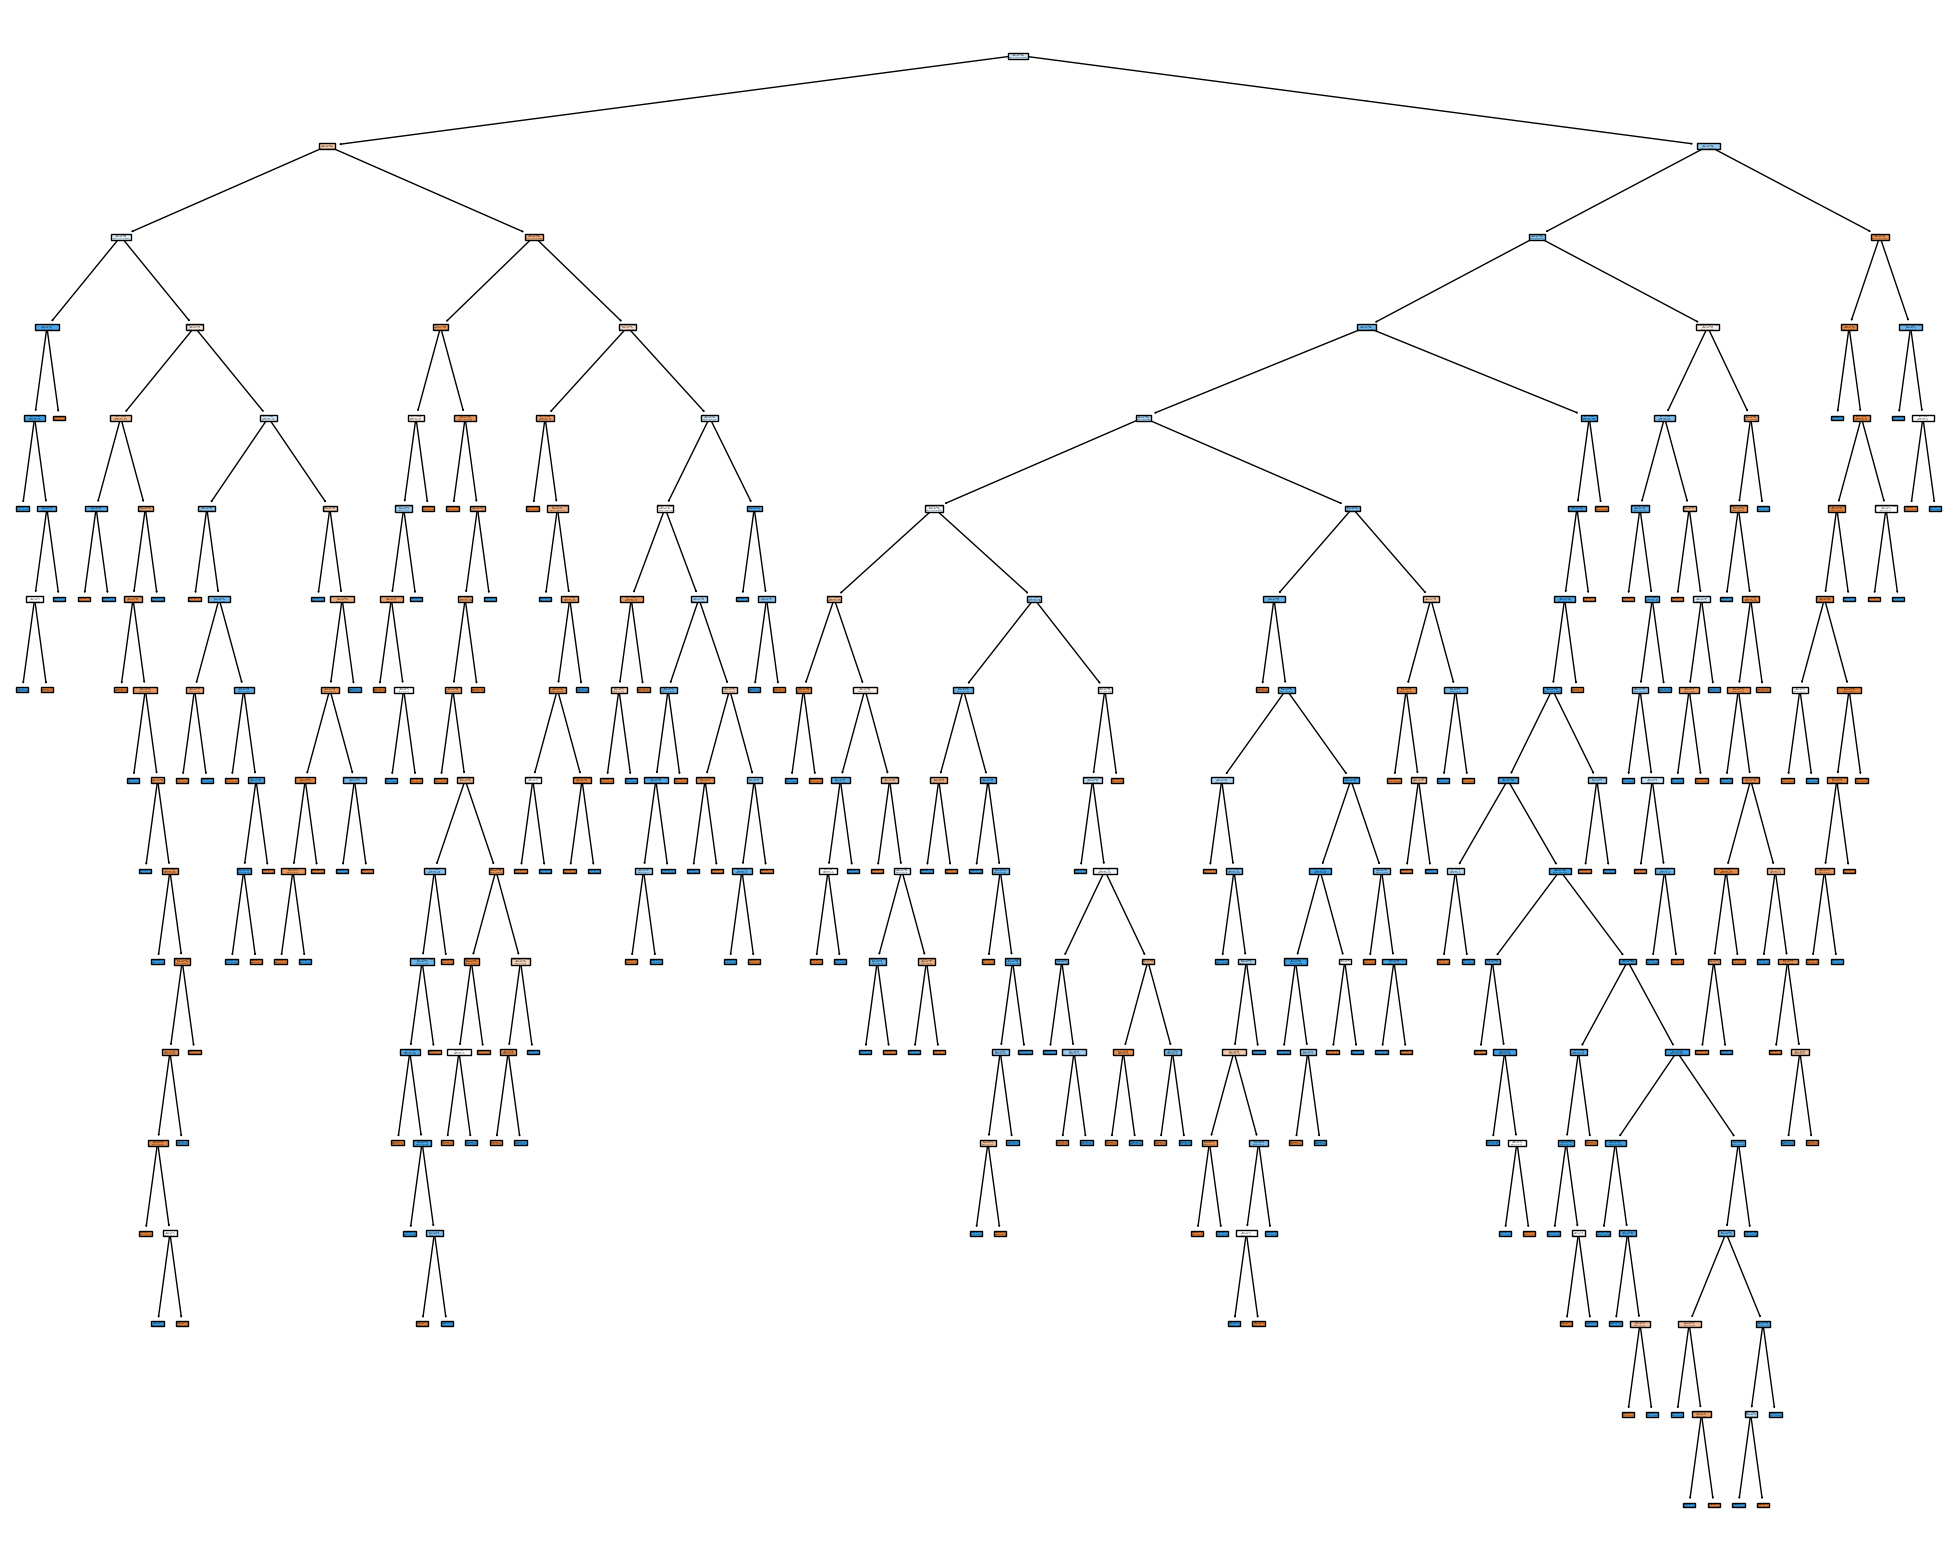

In [77]:
fig = plt.figure(figsize=(25,20))
_=plot_tree(rf.estimators_[0], feature_names=list(X.columns),
                   class_names=None,
                   filled=True)

**Check different base learners of the forest and compare them between them and to the single tree we trained at the beginning of the lab. What do you observe?**

## Tuning random forests

We will now analyse different parameters that we can tune in the random forest model.

In [ ]:
# Tuning Random Forest parameters
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_tuned.fit(X_train, y_train)

# Predict and evaluate the tuned Random Forest
y_pred_class_tuned = rf_tuned.predict(X_test)
print("Tuned Random Forest Classification Accuracy:", accuracy_score(y_test, y_pred_class_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_class_tuned))

**Experiment with the different parameters. Propose an appropriate value for each parameter to maximise efficiency and accuracy.**

# K-NN

We will perform the same tasks but with a k-NN model.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Using scikit-learn for kNN
# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_class = knn.predict(X_test)
print("kNN Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

**Find an appropriate k to maximise accuracy while avoiding overfitting.**

Note that it is difficult to visualise decision regions since we are using many features to classify.

# Grading chart

|Category |	Points |	Description|
|---------|--------|-------------|
|Code Functionality and report|	3 |	The code runs without errors and all questions are answered in a readable manner. |
|Data Loading and Exploration|	1 |	Correctly explores the Wine Quality dataset |
|Model Evaluation for Decision Trees|	1.5|	Correctly calculates and displays accuracy, confusion matrix, and classification report for decision trees.|
|Pruning and Analysis|	1.5	| Implements pruning correctly, evaluates and discusses the impact of tree depth on performance.|
|Splitting Criteria|	1|	Changes splitting criteria and analyzes differences in performance (accuracy/confusion matrix).|
|Random Forest Implementation|	0.5	| Correctly  evaluates performance with appropriate metrics.|
|Visualization of Random Forests|	0.5|	Visualizes individual trees from the forest and provides a comparison with the decision tree.|
|Tuning Random Forest Parameters|	1 |	Discusses parameter tuning and proposes appropriate values for maximization of efficiency and accuracy.|
|k-NN Implementation|	1 |	Implements k-NN and evaluates accuracy, confusion matrix, and classification report correctly.|
|Finding Optimal k|	1	|Analyzes the choice of k in the k-NN model and discusses the balance between accuracy and overfitting.|
